# KG-Hub Tutorial 5 - Graph ML case study

##### Here we describe a more detailed graph ML case study using KG-Hub graph data. The intention is to show how the various features of KG-Hub and GRAPE can be used to extract knowledge from KGs using graph ML.

This workflow will demonstrate how to use KG-Hub and GRAPE for:
- Getting the graph
    - getting a stable, versioned graph data from KG-Hub for a particular KG project
- Loading the graph
    - loading the graph in GRAPE and getting a summary of the graph and its topology
- Examining the graph
    - getting a sense of the graph topology
- Making node embeddings and evaluate them
    - producing node embeddings, and evaluating them with detailed metrics provided by GRAPE
- Using cosine similarity to rank drugs for relevance to COVID-19

This will demonstrate several useful features of KG-Hub and GRAPE in graph ML workflows:
- Pinning of analyses to versioned builds of KG projects (here the 20200925 build of KG-COVID-19, using stable, permanent URLs
- Tight integration of KG-Hub graphs with GRAPE - KG-Hub data can be read directly into GRAPE
- Using GRAPE to produce a very detailed analysis of KGs from KG-Hub, summarizing the data and graph topology in seconds
- Quickly producing node embeddings and examining the features of these node embeddings (see tSNE plots below)
- Using these node embeddings to rank the relevance of drugs in the KG to a node of interest (here, SARS-CoV-2)

## Getting the graph

First, install GraPE and a variety of other dependencies with `pip`:

In [1]:
!pip install -qU grape

In [ ]:
We will have a look here to see what builds of this KG are available:
https://kg-hub.berkeleybop.io/kg-covid-19/    

In [ ]:
We will pin our analysis to one of the earlier builds (20200925) of KG-COVID-19. This project has evolved a lot since Sept 2020, but this will give us only data that was available early on in the pandemic.

In [36]:
!wget https://kg-hub.berkeleybop.io/kg-covid-19/20200925/kg-covid-19.tar.gz
!tar -xvzf kg-covid-19.tar.gz

x merged-kg_nodes.tsv
x merged-kg_edges.tsv


## Loading the graph

In [ ]:
from grape import Graph
g = Graph.from_csv(
  directed=False, # This is a directed graph - we're treating it as undirected to make it easier to examine paths.
  node_path='merged-kg_nodes.tsv',
  edge_path='merged-kg_edges.tsv',
  verbose=True,
  nodes_column='id',
  node_list_node_types_column='category',
  default_node_type='biolink:NamedThing',
  sources_column='subject',
  destinations_column='object',
  edge_list_edge_types_column='relation',
  name="KG-COVID-19 version 20200925"
)

We will select only the largest connected component from the KG to analyze:

In [ ]:
g = g.remove_components(top_k_components=1)

In [ ]:
## Examine the graph

Before doing any graph ML, it is usually a good idea to take a look at the graph and get a sense of the data and its topology

GRAPE makes this very easy - just type the name of graph (here `g`) and GRAPE will return a very detailed summary of the graph:

In [45]:
g

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>KG-COVID-19 version 20200925</h2><p class="paragraph">The undirected multigraph KG-COVID-19 version 20200925 has 365.58K heterogeneous nodes and 15.47M heterogeneous edges. The graph is connected, that is, it is composed of a single connected component that includes all nodes and edges. The RAM requirements for the nodes and edges data structures are 49.76MB and 126.71MB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 1, the maximum node degree is 90.38K, the mode degree is 1, the mean degree is 84.65 and the node degree median is 7.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='https://ncbi.nlm.nih.gov/mesh/?term=D014780' target='_blank' title='Go to NCBI Mesh to get more informations about MESH:D014780'>MESH:D014780</a> (degree 90.38K and node type <a href='https://biolink.github.io/biolink-model/docs/OntologyClass.html' target='_blank' title='Go to BioLink to get more informations about biolink:OntologyClass'>biolink:OntologyClass</a>), <a href='https://ncbi.nlm.nih.gov/mesh/?term=D006801' target='_blank' title='Go to NCBI Mesh to get more informations about MESH:D006801'>MESH:D006801</a> (degree 78.25K and node type <a href='https://biolink.github.io/biolink-model/docs/OntologyClass.html' target='_blank' title='Go to BioLink to get more informations about biolink:OntologyClass'>biolink:OntologyClass</a>), <a href='https://www.wikidata.org/wiki/Q30' target='_blank' title='Go to WikiData to get more informations about WD:Q30'>WD:Q30</a> (degree 65.22K and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='https://ncbi.nlm.nih.gov/mesh/?term=D014777' target='_blank' title='Go to NCBI Mesh to get more informations about MESH:D014777'>MESH:D014777</a> (degree 54.16K and node type <a href='https://biolink.github.io/biolink-model/docs/OntologyClass.html' target='_blank' title='Go to BioLink to get more informations about biolink:OntologyClass'>biolink:OntologyClass</a>) and <a href='https://ncbi.nlm.nih.gov/mesh/?term=D017934' target='_blank' title='Go to NCBI Mesh to get more informations about MESH:D017934'>MESH:D017934</a> (degree 45.20K and node type <a href='https://biolink.github.io/biolink-model/docs/OntologyClass.html' target='_blank' title='Go to BioLink to get more informations about biolink:OntologyClass'>biolink:OntologyClass</a>).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 35 node types, of which the 10 most common are <a href='https://biolink.github.io/biolink-model/docs/Publication.html' target='_blank' title='Go to BioLink to get more informations about biolink:Publication'>biolink:Publication</a> (129.49K nodes, 35.42%), <a href='https://biolink.github.io/biolink-model/docs/OntologyClass.html' target='_blank' title='Go to BioLink to get more informations a

This summary provides a very nice overview of the contents and the topology of our KG. 

The two highest degree nodes are the MESH terms for viruses and humans, which makes sense given the subject of this KG. The most common node type is `biolink:Publication`, owing to our ingest of the Scibite-CORD19 publication dataset. We see some topological oddities of which we should be aware. These include a chain of 14 nodes, about 11k isomorphic node groups (members of these groups will have the same node embeddings for random walk-based embedding methods), and dendritic trees/stars/tendril stars (which will bias embeddings for nodes contained in these dendritic oddities, and will also prevent edges from being selected from 

These oddities can confuse and bias graph ML models, but since we will be using our model to rank interesting drugs that might be followed up on with other work to confirm/corroborate each drug, this is probably okay. GRAPE has methods such as these to remove these oddities if need be:

* `remove_tendrils`
* `remove_dendritic_trees`

## Make node embeddings

Now we will make node embeddings. We are spoiled for choice here - there are many different models to choose from:

In [56]:
from grape import get_available_models_for_node_embedding
get_available_models_for_node_embedding()

,model_name,task_name,library_name,available,requires_node_types,can_use_node_types,requires_edge_types,can_use_edge_types,requires_edge_weights,can_use_edge_weights,requires_positive_edge_weights
0,Walklets SkipGram,Node Embedding,Ensmallen,True,False,True,False,True,False,True,True
2,Degree-based SPINE,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
3,DeepWalk CBOW,Node Embedding,Ensmallen,True,False,True,False,True,False,True,True
4,Structured Embedding,Node Embedding,Ensmallen,True,False,False,True,True,False,False,False
6,Node-label-based SPINE,Node Embedding,Ensmallen,True,True,True,False,False,False,False,False
7,First-order LINE,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
9,Second-order LINE,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
11,RUINE,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
12,Laplacian Eigenmaps,Node Embedding,Ensmallen,True,False,False,False,False,False,False,False
14,Node2Vec CBOW,Node Embedding,Ensmallen,True,False,True,False,True,False,True,True


In [ ]:
We will use first order Deep Walk SkipGram embeddings, which will take an hour or two, but will capture the topology well

In [229]:
from grape.embedders import DeepWalkSkipGramEnsmallen
embeddings = DeepWalkSkipGramEnsmallen().fit_transform(g)

In [ ]:
Now let's get a sense of how well we have embedded the nodes. GRAPE provides a very detailed summary of embeddings with just this one command:

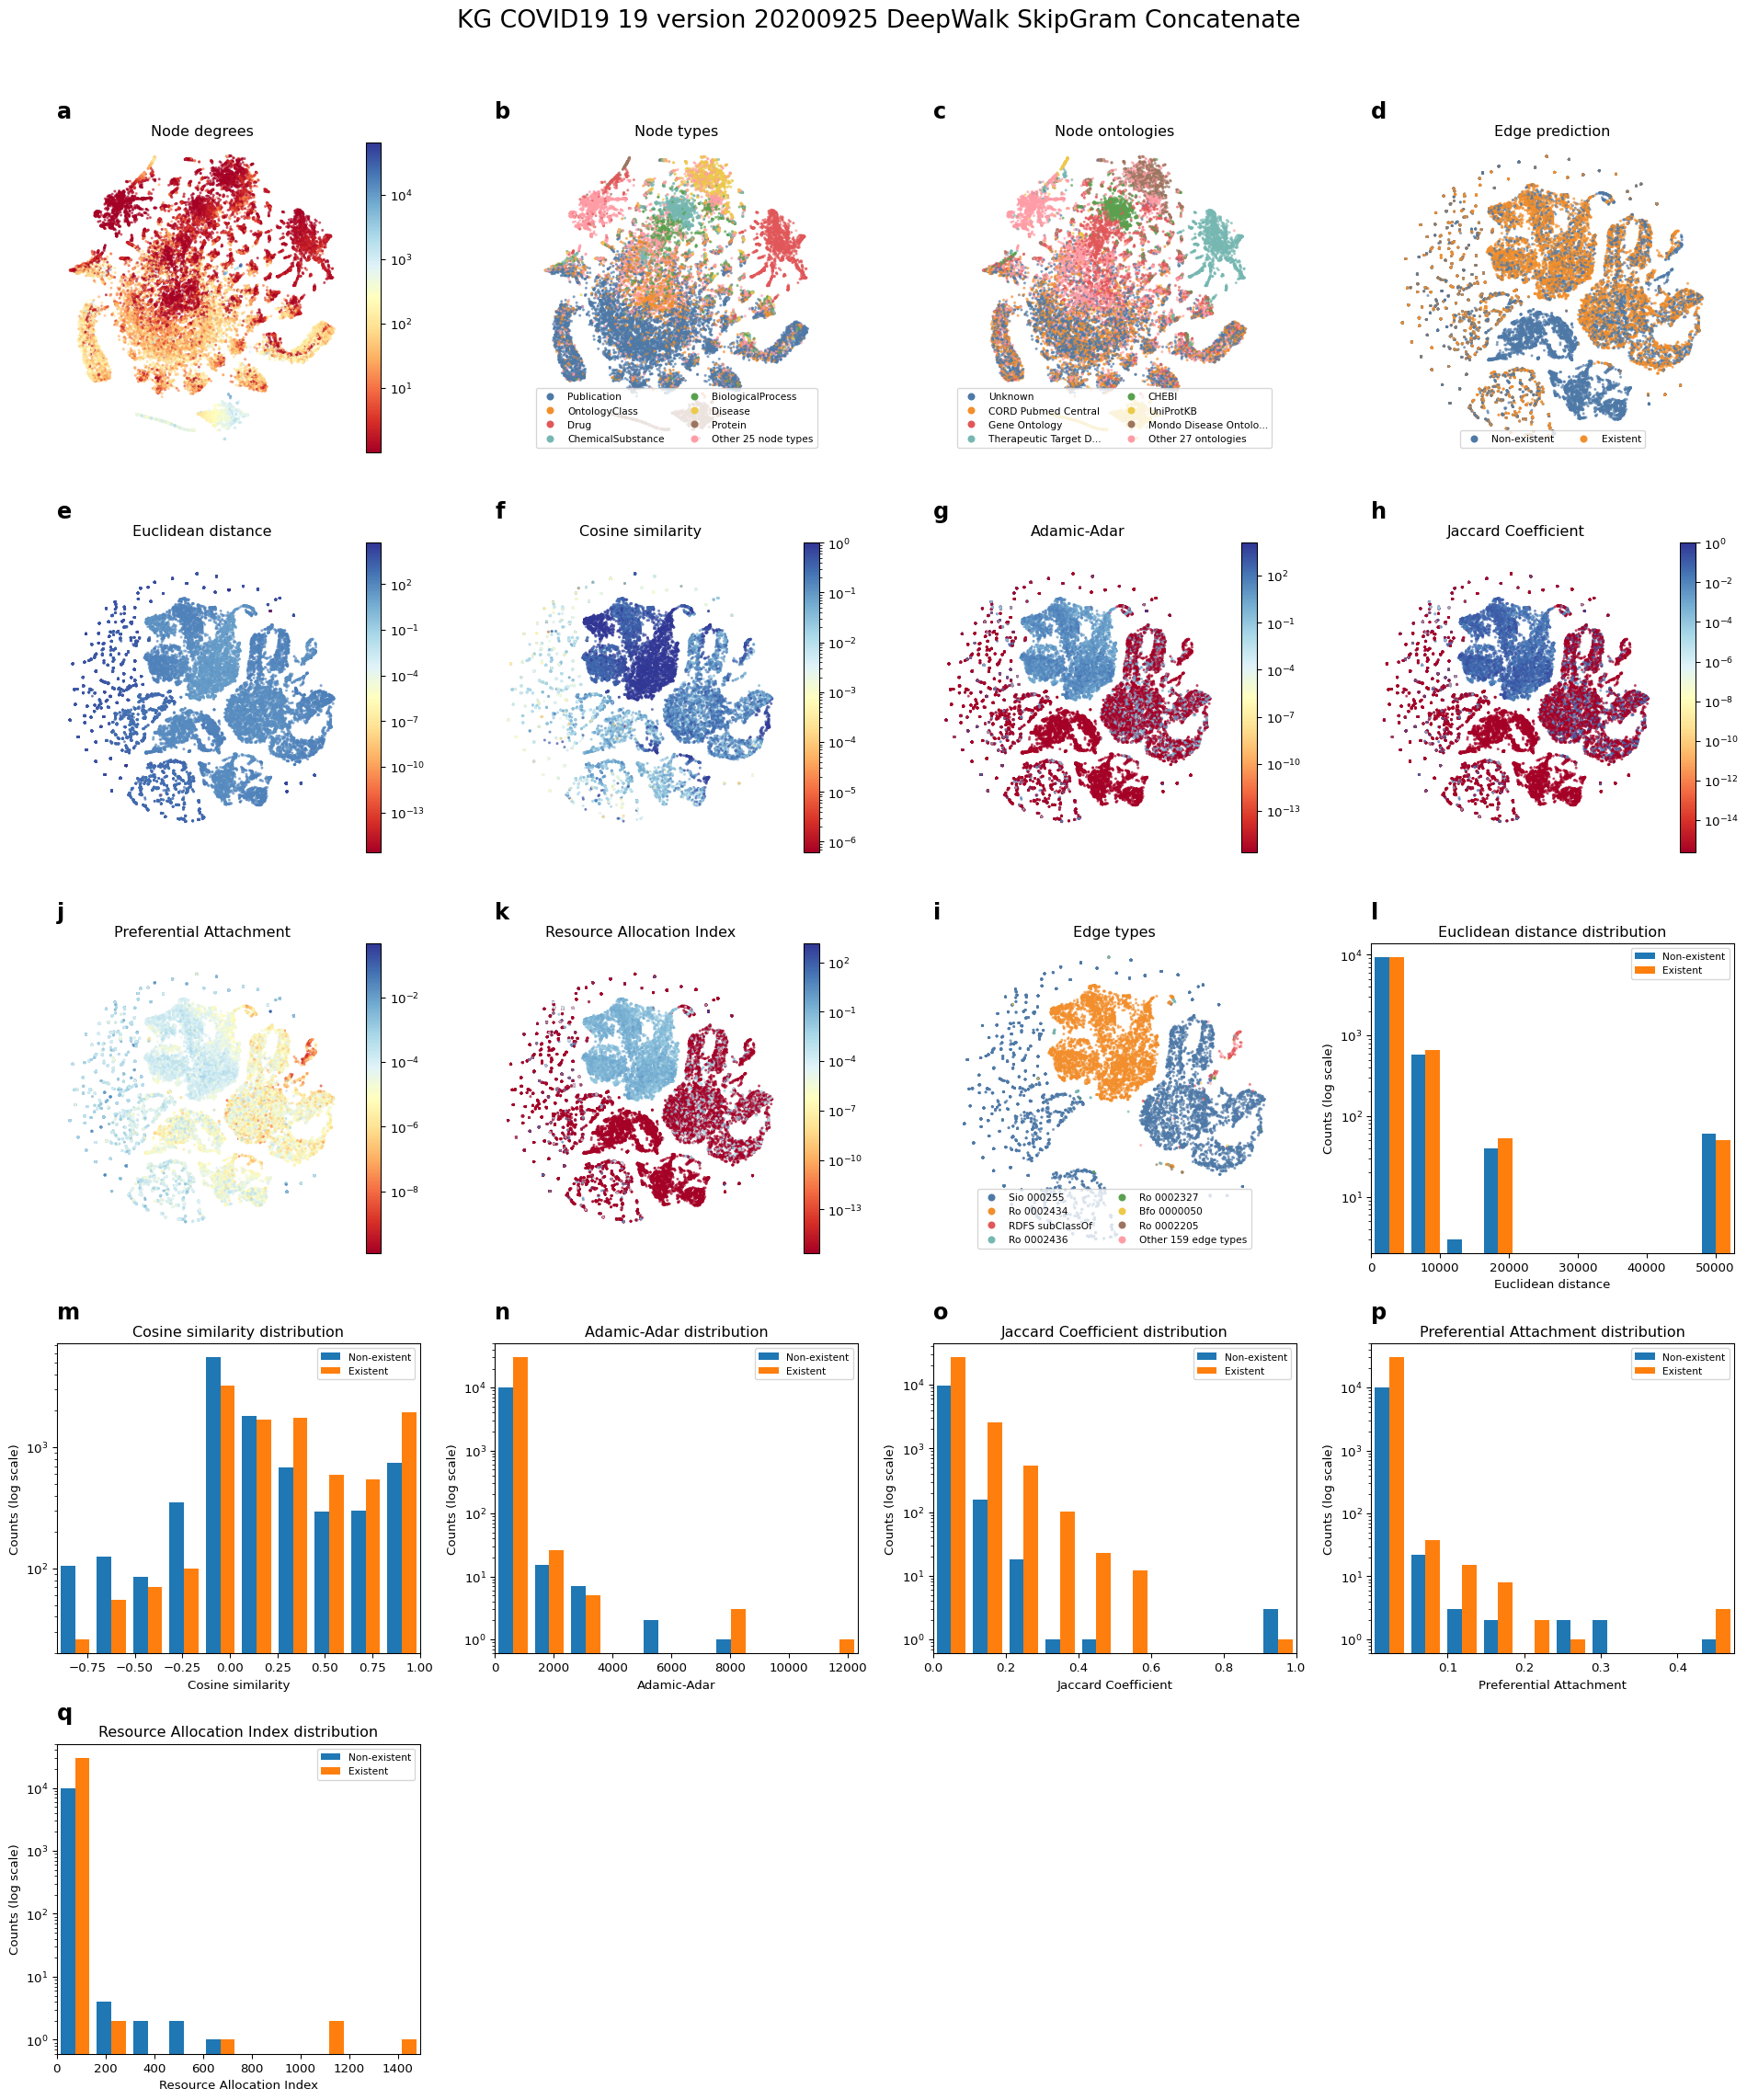

In [230]:
from grape import GraphVisualizer
GraphVisualizer(g).fit_and_plot_all(embeddings)

Above is a detailed analysis of the embeddings based on tSNE transformation of the embeddings, automatically provided by GRAPE. 

Of particular interest to us: in panels B and C we observe fairly good separation between node types and node sources, respectively. This suggests that the embeddings contain information about what sort of entities they are, and implies that they will be useful for downstream tasks such as node classification.

Note also panels D and M, which show analyses of edge embeddings (generated by combining the embeddings of the two nodes involved in the edge). We observe fairly good separation between edges embeddings that actually exist in the graph (orange) and randomly selected 'negative' edges that do not exist in the graph (blue) (note that the y-axis is log-scaled). Again, this suggests that these embeddings will be useful for downstream tasks such as link prediction. 

## Use cosine similarity to rank drugs for relevance to COVID-19

Now let's do an experiment - let's rank drugs by their closeness to SARS-Cov-2, as measured by the cosine similarity between the embedding representing each drug and the embedding representing SARS-Cov-2. We can use this similarity to see if this provides information about drugs that may have a relationship, known or unknown, with COVID-19. 

Here's the node representing SARS-CoV-2:

In [231]:
sars_cov_2_curie = 'NCBITaxon:227859'

In [246]:
### Now let's get all the nodes representing CHEMBL drugs of interest:

In [233]:
chembl_drugs = [k for (k, v) in g.get_nodes_mapping().items() if k.startswith('CHEMBL.COMPOUND')]

In [ ]:
Now make a simple method `get_cosine_sim()` to calculate cosine similarity between SARS-CoV-2 and each CHEMBL drug:

In [234]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from scipy import spatial

def get_cosine_sim(sars_cov_2_curie: str, drug_curies: list, embeddings: pd.DataFrame, drug_names: pd.DataFrame) ->  np.ndarray:
    cosine_sim = np.full(len(drug_curies), -1000.0000)
    
    sars_cov_2_embedding = embeddings.loc[sars_cov_2_curie]

    for i, drug_curie in tqdm(enumerate(drug_curies)):
        cosine_sim[i] = 1 - spatial.distance.cosine(sars_cov_2_embedding, 
                                                    embeddings.loc[drug_curie]
                                                   ).flatten()[0]
    df = pd.DataFrame({'drug': drug_curies, 'cosine_sim': cosine_sim})
    
    
    df = pd.merge(df, drug_names, left_on='drug', right_on='id', how='left')
    
    return df.sort_values(by='cosine_sim',axis=0, ascending=False)

In [245]:
drug_names = pd.read_csv('merged-kg_nodes.tsv', sep='\t', on_bad_lines='skip')[['id', 'name']]
cosine_sims = get_cosine_sim(sars_cov_2_curie, chembl_drugs, embeddings.get_node_embedding_from_index(0), drug_names)

pd.set_option('display.max_rows', 5)
cosine_sims.head(5)

/var/folders/vc/lfqgrrhn56d9yj5fbxbw6qr00000gt/T/ipykernel_74655/3851016019.py:1: DtypeWarning: Columns (4,5,7,8,9,10,11,12,13,14,15,16,17,21,22,24,25,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  drug_names = pd.read_csv('merged-kg_nodes.tsv', sep='\t', on_bad_lines='skip')[['id', 'name']]


0it [00:00, ?it/s]

,drug,cosine_sim,id,name
11156,CHEMBL.COMPOUND:CHEMBL1643,0.189162,CHEMBL.COMPOUND:CHEMBL1643,RIBAVIRIN
13137,CHEMBL.COMPOUND:CHEMBL1229,0.102934,CHEMBL.COMPOUND:CHEMBL1229,OSELTAMIVIR
19396,CHEMBL.COMPOUND:CHEMBL1222170,0.090420,CHEMBL.COMPOUND:CHEMBL1222170,NaN
20487,CHEMBL.COMPOUND:CHEMBL76,0.088848,CHEMBL.COMPOUND:CHEMBL76,CHLOROQUINE
10413,CHEMBL.COMPOUND:CHEMBL2074764,0.080679,CHEMBL.COMPOUND:CHEMBL2074764,NaN


In [ ]:
Notice that two antiviral drugs (ribavirin and oseltamivir) appear in the top five ranked drugs. 
Also notice that chloroquine, a malaria drug that was investigated early on in the pandemic for 
COVID-19 treatment but found to not be effective, is in the top five ranked drugs too. This 
underscores the need for subsequent research and validation of all results from ML experiments!
However, this simple experiment indicates that embeddings are providing a ranking of drugs that
have some relationship to COVID-19/SARS-CoV-2.

In [236]:
cosine_sims.to_csv('cosine_sims.tsv', sep='\t')